# Machine Learning and Deep Learning Algorithms

## Linear and multilinear Regression

### Linear Regression equation

In [1]:
# Given data
x = [1, 2, 3, 4]
y = [3, 4, 5, 7]

# Calculate the necessary sums
n = len(x)
sum_x = sum(x)
sum_y = sum(y)
sum_xy = sum(xi * yi for xi, yi in zip(x, y))
sum_x_squared = sum(xi**2 for xi in x)

# Calculate the slope (m) and y-intercept (b)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
b = (sum_y - m * sum_x) / n

# Print the results
print(f"Slope (m): {m}")
print(f"Y-Intercept (b): {b}")

# The linear regression equation
equation = f"y = {m}x + {b}"
print(f"Linear Regression Equation: {equation}")

# Use the equation to make predictions for the same x
x_predictions = x
y_predictions = [m * xi + b for xi in x_predictions]
print(f"Predicted y for x: {y_predictions}")

# Calculate the error (residuals)
errors = [yi - (m * xi + b) for xi, yi in zip(x, y)]
print(f"Errors (Residuals): {errors}")

# Calculate the mean squared error
mse = sum(error**2 for error in errors) / n
print(f"Mean Squared Error (MSE): {mse}")

# Use the equation to make predictions
x_new = 5
y_pred = m * x_new + b
print(f"Predicted y for x={x_new}: {y_pred}")

Slope (m): 1.3
Y-Intercept (b): 1.5
Linear Regression Equation: y = 1.3x + 1.5
Predicted y for x: [2.8, 4.1, 5.4, 6.7]
Errors (Residuals): [0.20000000000000018, -0.09999999999999964, -0.40000000000000036, 0.2999999999999998]
Mean Squared Error (MSE): 0.07500000000000005
Predicted y for x=5: 8.0


### Multiple linear regression equation

In [2]:
import numpy as np

# Given data
x1 = [1, 2, 3, 4]
x2 = [3, 1, 2, 4]
y = [3, 4, 5, 7]

# Create the design matrix X
X = np.vstack([np.ones(len(x1)), x1, x2]).T

# Calculate the coefficients (b0, b1, b2)
coefficients = np.linalg.inv(X.T @ X) @ X.T @ np.array(y)

# Extract coefficients
b0, b1, b2 = coefficients

# Print the results
print(f"Intercept (b0): {b0}")
print(f"Coefficient for x1 (b1): {b1}")
print(f"Coefficient for x2 (b2): {b2}")

# The multiple linear regression equation
equation = f"y = {b0} + {b1} * x1 + {b2} * x2"
print(f"Multiple Linear Regression Equation: {equation}")

# Use the equation to make predictions
x1_new = [1, 2, 3, 4]  # new values for x1
x2_new = [3, 1, 2, 4]  # new values for x2
y_pred = b0 + b1 * np.array(x1_new) + b2 * np.array(x2_new)
print(f"Predicted y for new values of x1 and x2: {y_pred}")

# Calculate the error (residuals)
errors = y - (b0 + b1 * np.array(x1) + b2 * np.array(x2))
print(f"Errors (Residuals): {errors}")

# Calculate the mean squared error
mse = np.mean(errors**2)
print(f"Mean Squared Error (MSE): {mse}")

Intercept (b0): 1.178571428571419
Coefficient for x1 (b1): 1.2142857142857157
Coefficient for x2 (b2): 0.2142857142857153
Multiple Linear Regression Equation: y = 1.178571428571419 + 1.2142857142857157 * x1 + 0.2142857142857153 * x2
Predicted y for new values of x1 and x2: [3.03571429 3.82142857 5.25       6.89285714]
Errors (Residuals): [-0.03571429  0.17857143 -0.25        0.10714286]
Mean Squared Error (MSE): 0.02678571428571423


#### Check for multicollinearity

In [3]:
# @ is the matrix multiplication operator or dot product
condition_number = np.linalg.cond(X.T @ X)

# If the condition number is too high, handle multicollinearity appropriately
if condition_number > 1 / np.finfo(float).eps:
    print("Warning: The matrix is close to singular. Consider addressing multicollinearity.")

# Calculate the coefficients only if the matrix is not close to singular
else:
    print("The matrix is not close to singular. Proceed with calculating the coefficients.")

The matrix is not close to singular. Proceed with calculating the coefficients.


### Adjusted R-squared

- R^2 ranges from 0 to 1, where 0 indicates that the model does not explain any variability, and 1 indicates that the model explains all the variability.

- Adjusted R^2 is a modified version of R^2 that takes into account the number of predictors in the model.

#### Simple linear regression

In [4]:
import numpy as np

# Given data
x = [1, 2, 3, 4]
y = [3, 4, 5, 7]

# Calculate the necessary sums
n = len(x)
sum_x = sum(x)
sum_y = sum(y)
sum_xy = sum(xi * yi for xi, yi in zip(x, y))
sum_x_squared = sum(xi**2 for xi in x)

# Calculate the slope (m) and y-intercept (b)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
b = (sum_y - m * sum_x) / n

# Calculate the predicted values
y_pred = [m * xi + b for xi in x]

# Calculate R-squared
ss_total = sum((yi - np.mean(y))**2 for yi in y)
ss_residual = sum((yi - y_pred[i])**2 for i, yi in enumerate(y))
r_squared = 1 - (ss_residual / ss_total)

# Calculate adjusted R-squared
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - 2)

# Print the results
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adj_r_squared}")

R-squared: 0.9657142857142857
Adjusted R-squared: 0.9485714285714286


#### Multiple linear regression:

In [5]:
import numpy as np

# Given data
x1 = [1, 2, 3, 4]
x2 = [3, 1, 2, 4]
y = [3, 4, 5, 7]

# Create the design matrix X
X = np.vstack([np.ones(len(x1)), x1, x2]).T

# Check for multicollinearity
condition_number = np.linalg.cond(X.T @ X)

# If the condition number is too high, handle multicollinearity appropriately
if condition_number > 1 / np.finfo(float).eps:
    print("Warning: The matrix is close to singular. Consider addressing multicollinearity.")
else:
    # Calculate the coefficients (b0, b1, b2)
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ np.array(y)

    # Calculate the predicted values
    y_pred = X @ coefficients

    # Calculate R-squared
    ss_total = sum((yi - np.mean(y))**2 for yi in y)
    ss_residual = sum((yi - y_pred[i])**2 for i, yi in enumerate(y))
    r_squared = 1 - (ss_residual / ss_total)

    # Calculate adjusted R-squared
    k = X.shape[1] - 1  # Number of predictors (excluding the intercept)
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

    # Print the results
    print(f"R-squared: {r_squared}")
    print(f"Adjusted R-squared: {adj_r_squared}")

R-squared: 0.9877551020408164
Adjusted R-squared: 0.9632653061224492


### Regression code

In [6]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create your feature matrix X and target variable y (assuming they are already defined)

# Initialize a linear regression model
regressor = LinearRegression()

# Fit the model using your feature matrix X and target variable y
regressor.fit(X, y)

# Print the intercept and coefficients of the linear regression model
print("Intercept (b0):", regressor.intercept_)
print("Coefficients (b1, b2, ...):", regressor.coef_)

# Use the model to make predictions on the training data
y_pred = regressor.predict(X)

# Evaluate the model using mean squared error and R^2 score
print('Mean Squared Error: %.2f' % mean_squared_error(y, y_pred))
print('R^2 Score: %.2f' % r2_score(y, y_pred))

# Use statsmodels for a detailed summary of the regression model
X_with_intercept = sm.add_constant(X)  # Add an intercept to the model
model = sm.OLS(y, X_with_intercept)   # Initialize the regression model
results = model.fit()  # Fit the regression model
print(results.summary())  # Print a detailed summary of the regression model

Intercept (b0): 1.1785714285714297
Coefficients (b1, b2, ...): [0.         1.21428571 0.21428571]
Mean Squared Error: 0.03
R^2 Score: 0.99
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     40.33
Date:                Sun, 10 Dec 2023   Prob (F-statistic):              0.111
Time:                        08:49:12   Log-Likelihood:                 1.5640
No. Observations:                   4   AIC:                             2.872
Df Residuals:                       1   BIC:                             1.031
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

c:\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## Logistic Regression

### PROBLEM 1

In [7]:
# PROBLEM 1
# A salesperson has visited 1000 customers to sell a book in a city. He has the data of several attributes of these customers (Income, education level, interest in reading, etc.). Finally, he has also maintained the record of who purchased the book or not. He uses logistic regression model to build a model for this data. Assume that the cost of the book is Rs. 500, selling price of the book is Rs. 3000, average cost of visiting a customer is Rs. 200. The salesperson gets a new list of 10000 customers and the attributes used in building the model. For a person, the probability of purchasing the book comes out as 0.6. Should the salesperson visit this customer? What if the probability comes out as 0.4?
# Given data
selling_price = 3000
cost_of_book = 500
cost_of_visiting = 200
probability_purchase_0_6 = 0.6

# Calculate expected profit for probability = 0.6
expected_profit_0_6 = probability_purchase_0_6 * \
    (selling_price - cost_of_book) - cost_of_visiting
print(f"Expected Profit for P(Purchase) = 0.6: Rs. {expected_profit_0_6}")

Expected Profit for P(Purchase) = 0.6: Rs. 1300.0


### Logistic Regression code

In [8]:
Price = np.array([2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5])
X = Price.reshape(-1, 1)
y = np.array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Print the intercept
intercept_ = model.intercept_
print("Intercept:", intercept_)

# Print the coefficients
coefficients = model.coef_[0]
print("Coefficients:", coefficients)

# Print the model coefficients for each feature
class_coefficients = model.coef_
print("Classes:", class_coefficients)

# Print the probability of each class
print("Probability of each class:\n", model.predict_proba(X_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

print("Probability of each class:", y_pred)
print("Actual classes:", y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Intercept: [1.16606326]
Coefficients: [-0.4003866]
Classes: [[-0.4003866]]
Probability of each class:
 [[0.4096796  0.5903204 ]
 [0.69759462 0.30240538]
 [0.69759462 0.30240538]
 [0.4096796  0.5903204 ]]
Probability of each class: [1 0 0 1]
Actual classes: [1 0 0 1]
Accuracy: 1.0


### predicted_probability

In [10]:
import numpy as np


def logistic_function(intercept, coefficients, X):
    # Calculate the linear combination of intercept and coefficients
    linear_combination = np.dot(X, coefficients) + intercept

    # Calculate the predicted probabilities using the logistic function
    predicted_probabilities = 1 / (1 + np.exp(-linear_combination))

    return predicted_probabilities


# Example usage:
intercept = intercept_
coefficients = coefficients
X_example = 2.5  # Replace this with your actual predictor value

# Calculate predicted probability
predicted_probability = logistic_function(intercept, coefficients, X_example)

print(f"Predicted Probability: {predicted_probability}")

Predicted Probability: [0.54118069]


### confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Given data
y_test = [1, 0, 1, 0, 1, 1, 0, 1, 0, 0]
y_pred = [1, 0, 1, 0, 1, 0, 1, 1, 0, 0]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Another method to calculate the confusion matrix
print("\nAnother method to calculate the confusion matrix:\n")
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Extract values from the confusion matrix
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_negative = conf_matrix[0, 0]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = true_positive / \
    (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
print(f"Precision: {precision:.2f}")

# Recall
recall = true_positive / \
    (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = 2 * (precision * recall) / (precision +
                                 recall) if (precision + recall) != 0 else 0
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[4 1]
 [1 4]]
Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.80

Another method to calculate the confusion matrix:

Confusion Matrix:
[[4 1]
 [1 4]]
Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.80


## Gradient Descent 

##### f(x) = x^2

Final x: 0.04323455642275677


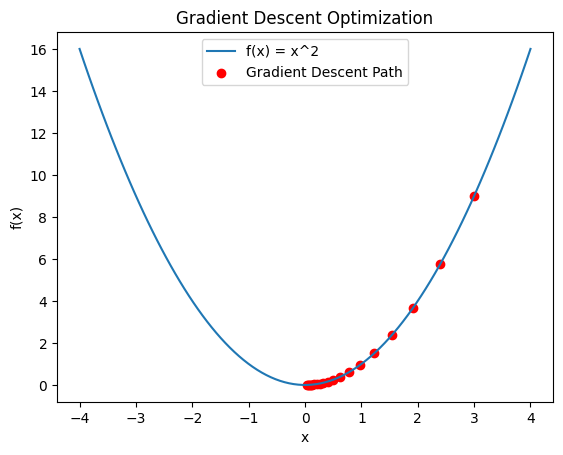

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Function to minimize (example: f(x) = x^2)


def function_to_minimize(x):
    return x**2

# Derivative of the function (gradient)


def gradient(x):
    return 2 * x

# Gradient Descent function


def gradient_descent(initial_x, learning_rate, num_iterations):
    x_values = []
    y_values = []

    x = initial_x

    for _ in range(num_iterations):
        x_values.append(x)
        y_values.append(function_to_minimize(x))

        # Update x using the gradient and learning rate
        x = x - learning_rate * gradient(x)

    return x_values, y_values


# Set parameters
initial_x = 3.0
learning_rate = 0.1
num_iterations = 20

# Run Gradient Descent
x_values, y_values = gradient_descent(initial_x, learning_rate, num_iterations)

# Print the final value of x (the minimum of the function)
print("Final x:", x_values[-1])

# Plot the function and the path taken by Gradient Descent
x_vals = np.linspace(-4, 4, 100)
y_vals = function_to_minimize(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = x^2')
plt.scatter(x_values, y_values, color='red', label='Gradient Descent Path')
plt.title('Gradient Descent Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

##### f(x, y) = x^2 + y^2

Final x: 0.04323455642275677
Final y: 0.04323455642275677


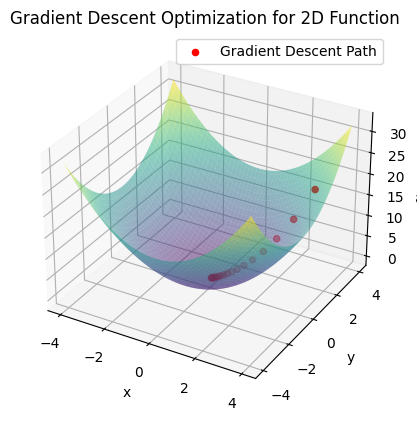

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to minimize (example: f(x, y) = x^2 + y^2)


def function_to_minimize(x, y):
    return x**2 + y**2

# Partial derivatives (gradients)


def gradient(x, y):
    df_dx = 2 * x
    df_dy = 2 * y
    return df_dx, df_dy

# Gradient Descent function for two variables


def gradient_descent_2d(initial_x, initial_y, learning_rate, num_iterations):
    x_values = []
    y_values = []
    z_values = []

    x, y = initial_x, initial_y

    for _ in range(num_iterations):
        x_values.append(x)
        y_values.append(y)
        z_values.append(function_to_minimize(x, y))

        # Update x and y using the gradients and learning rate
        df_dx, df_dy = gradient(x, y)
        x = x - learning_rate * df_dx
        y = y - learning_rate * df_dy

    return x_values, y_values, z_values


# Set parameters
initial_x = 3.0
initial_y = 3.0
learning_rate = 0.1
num_iterations = 20

# Run Gradient Descent for two variables
x_values, y_values, z_values = gradient_descent_2d(
    initial_x, initial_y, learning_rate, num_iterations)

# Print the final values of x and y (the minimum of the function)
print("Final x:", x_values[-1])
print("Final y:", y_values[-1])

# Plot the 3D surface of the function and the path taken by Gradient Descent
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = np.linspace(-4, 4, 100)
y_vals = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = function_to_minimize(X, Y)

ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
ax.scatter(x_values, y_values, z_values, color='red',
           label='Gradient Descent Path')
ax.set_title('Gradient Descent Optimization for 2D Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()

plt.show()

##### f(x, y, z) = x^2 + y^2 + z^2

Final values: [0.03458765 0.03458765 0.03458765]


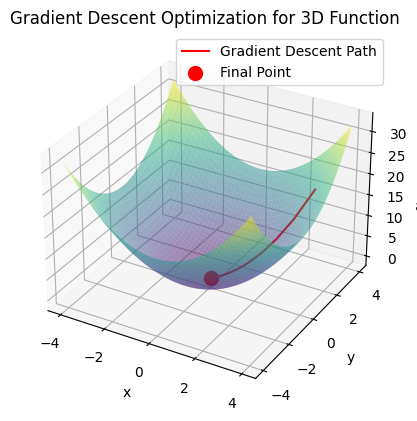

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to minimize (example: f(x, y, z) = x^2 + y^2 + z^2)


def function_to_minimize(x, y, z):
    return x**2 + y**2 + z**2

# Partial derivatives (gradients)


def gradient(x, y, z):
    df_dx = 2 * x
    df_dy = 2 * y
    df_dz = 2 * z
    return df_dx, df_dy, df_dz

# Gradient Descent function for k variables


def gradient_descent_kd(initial_values, learning_rate, num_iterations):
    k = len(initial_values)
    values = [np.array(initial_values)]

    for _ in range(num_iterations):
        current_values = values[-1]
        gradients = np.array(gradient(*current_values))
        update = learning_rate * gradients
        new_values = current_values - update
        values.append(new_values)

    return np.array(values)


# Set parameters
initial_values = [3.0, 3.0, 3.0]  # Initial values for x, y, z
learning_rate = 0.1
num_iterations = 20

# Run Gradient Descent for k variables
path = gradient_descent_kd(initial_values, learning_rate, num_iterations)

# Create 2D arrays for plotting
x_vals = np.linspace(-4, 4, 100)
y_vals = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = function_to_minimize(X, Y, 0)  # Assuming z is constant for the plot

# Print the final values of x, y, and z (the minimum of the function)
print("Final values:", path[-1])

# Plot the 3D surface of the function and the path taken by Gradient Descent
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
ax.plot(path[:, 0], path[:, 1], function_to_minimize(path[:, 0], path[:, 1], 0),
        color='red', label='Gradient Descent Path')
ax.scatter(path[-1, 0], path[-1, 1], function_to_minimize(path[-1, 0], path[-1, 1], 0),
           color='red', marker='o', s=100, label='Final Point')

ax.set_title('Gradient Descent Optimization for 3D Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y, z)')
ax.legend()

plt.show()

## Multiple classification models softmax

In [15]:
import numpy as np
import pandas as pd

# Given data
data = {
    'S.No': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X1': [0.12, 0.14, 0.47, 0.43, 0.37, 0.13, 0.41, 0.16, 0.31, 0.22],
    'X2': [0.11, 0.44, 0.50, 0.14, 0.40, 0.49, 0.13, 0.12, 0.38, 0.29],
    'Class': ['Green', 'Blue', 'Red', 'Green', 'Blue', 'Blue', 'Blue', 'Red', 'Green', 'Red']
}


def softmax(scores):
    exp_scores = np.exp(scores)
    probabilities = exp_scores / np.sum(exp_scores, axis=0)
    return probabilities


# Convert 'X1' and 'X2' to NumPy arrays
X1 = np.array(data['X1'])
X2 = np.array(data['X2'])

# Coefficients for each class
alpha_g, beta_g1, beta_g2 = 1, 2, 3
alpha_b, beta_b1, beta_b2 = 4, -5, 6
alpha_r, beta_r1, beta_r2 = 7, 8, -9

# Calculate scores for each class
scores_g = alpha_g + beta_g1 * X1 + beta_g2 * X2
scores_b = alpha_b + beta_b1 * X1 + beta_b2 * X2
scores_r = alpha_r + beta_r1 * X1 + beta_r2 * X2

# Combine scores for all classes
all_scores = np.vstack([scores_g, scores_b, scores_r])

# Apply Softmax function to get probabilities
softmax_probs = softmax(all_scores)

# Create a DataFrame for Softmax probabilities
class_labels = ['Green', 'Blue', 'Red']
softmax_df = pd.DataFrame(softmax_probs.T, columns=class_labels)

# Combine with original data for better understanding
result_df = pd.concat([pd.DataFrame(data), softmax_df], axis=1)

# Print the result DataFrame
print(result_df)

   S.No    X1    X2  Class     Green      Blue       Red
0     1  0.12  0.11  Green  0.004265  0.051441  0.944294
1     2  0.14  0.44   Blue  0.029431  0.830513  0.140056
2     3  0.47  0.50    Red  0.047325  0.158705  0.793970
3     4  0.43  0.14  Green  0.001005  0.001515  0.997480
4     5  0.37  0.40   Blue  0.027343  0.136793  0.835864
5     6  0.13  0.49   Blue  0.025891  0.910426  0.063683
6     7  0.41  0.13   Blue  0.001005  0.001691  0.997304
7     8  0.16  0.12    Red  0.003846  0.036124  0.960030
8     9  0.31  0.38  Green  0.028342  0.203231  0.768427
9    10  0.22  0.29    Red  0.017300  0.177809  0.804891


In [16]:
def softmaxscore(class_label, result_df):
    result = 1
    # Iterate over each observation
    for i in range(len(class_label)):
        # Multiply the Softmax probability for the corresponding class
        result *= result_df[class_label[i]].iloc[i]

    return result


result_of_softmaxscore = softmaxscore(result_df["Class"], result_df)
print("result_of_softmaxscore:", result_of_softmaxscore)

result_of_softmaxscore: 1.3035530902219383e-11


## Clustering

### k-means algorithm

#### Stepwise method

In [17]:
import numpy as np


def k_means_clustering(data, initial_centers, max_iterations=100):
    centers = np.array(initial_centers)

    for iteration in range(max_iterations):
        # Step 1: Assign each point to the nearest cluster
        clusters = {}
        for point in data:
            distances = [abs(point - center) for center in centers]
            nearest_cluster = np.argmin(distances)
            if nearest_cluster not in clusters:
                clusters[nearest_cluster] = []
            clusters[nearest_cluster].append(point)

        # Step 2: Update the cluster centers
        new_centers = [np.mean(clusters[cluster]) for cluster in clusters]

        # Print current iteration results
        print(f"Iteration {iteration + 1}:")
        print("Clusters:", clusters)
        print("Centers:", new_centers)
        print()

        # Check for convergence
        if np.array_equal(centers, new_centers):
            print("Convergence reached. Stopping iterations.")
            break

        # Update centers for the next iteration
        centers = np.array(new_centers)

    return clusters, centers


# Given data
data = [1, 3, 5, 7, 8, 40, 45]

# Initial centers
initial_centers = [5, 7]

print("Initial Data:", data)
print("Initial Centers:", initial_centers)
print()
# Perform k-means clustering
final_clusters, final_centers = k_means_clustering(data, initial_centers)

# Print final results
print("Final Clusters:", final_clusters)
print("Final Centers:", final_centers)

Initial Data: [1, 3, 5, 7, 8, 40, 45]
Initial Centers: [5, 7]

Iteration 1:
Clusters: {0: [1, 3, 5], 1: [7, 8, 40, 45]}
Centers: [3.0, 25.0]

Iteration 2:
Clusters: {0: [1, 3, 5, 7, 8], 1: [40, 45]}
Centers: [4.8, 42.5]

Iteration 3:
Clusters: {0: [1, 3, 5, 7, 8], 1: [40, 45]}
Centers: [4.8, 42.5]

Convergence reached. Stopping iterations.
Final Clusters: {0: [1, 3, 5, 7, 8], 1: [40, 45]}
Final Centers: [ 4.8 42.5]


#### k-mean package code

In [18]:
import numpy as np
from sklearn.cluster import KMeans

# Data points
data_points = np.array([1, 3, 5, 7, 8, 40, 45]).reshape(-1, 1)

# Number of clusters
k = 2

# Initial centroids
initial_centroids = np.array([[5], [7]])

# KMeans model
kmeans = KMeans(n_clusters=k, init=initial_centroids,
                n_init=1, random_state=42)

# Fit the model to the data
kmeans.fit(data_points)

# Get cluster assignments and centroids
cluster_assignments = kmeans.labels_
centroids = kmeans.cluster_centers_

# Display results
print("Cluster Assignments:", cluster_assignments)
print("Centroids:", centroids)
print("SSE:", kmeans.inertia_)

Cluster Assignments: [0 0 0 0 0 1 1]
Centroids: [[ 4.8]
 [42.5]]
SSE: 45.3


#### Elbow method

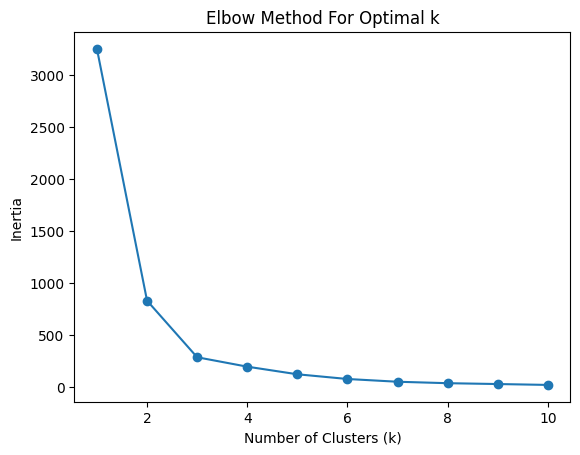

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


def find_optimal_k(data, max_k=10):
    distortions = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data.reshape(-1, 1))
        distortions.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()


# Example usage with the provided data
data = np.array([25, 6, 13, 16, 11, 24, 23, 17, 4, 25, 14, 2, 22, 15, 4, 8, 21, 13, 29, 16, 15, 21, 3, 9,
                 22, 18, 8, 30, 7, 27, 8, 6, 12, 14, 22, 3, 25, 25, 10, 12, 24, 23, 2, 13, 15, 27, 4, 26, 18, 21])
find_optimal_k(data)

#### Davies–Bouldin index (DB index)

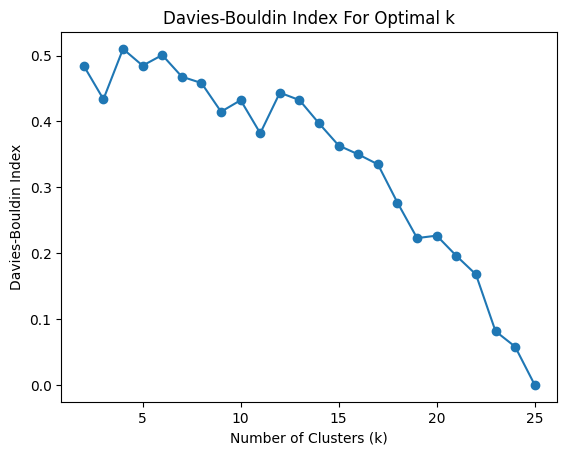

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np


def find_optimal_k_db_index(data, max_k=25):
    db_indices = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data.reshape(-1, 1))
        db_index = davies_bouldin_score(data.reshape(-1, 1), labels)
        db_indices.append(db_index)

    # Plot the DB indices
    plt.plot(range(2, max_k + 1), db_indices, marker='o')
    plt.title('Davies-Bouldin Index For Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Davies-Bouldin Index')
    plt.show()

# Example usage with the provided data
data = np.array([25, 6, 13, 16, 11, 24, 23, 17, 4, 25, 14, 2, 22, 15, 4, 8, 21, 13, 29, 16, 15, 21, 3, 9,
                 22, 18, 8, 30, 7, 27, 8, 6, 12, 14, 22, 3, 25, 25, 10, 12, 24, 23, 2, 13, 15, 27, 4, 26, 18, 21])
find_optimal_k_db_index(data)

#### Cluster similaritys

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


def calculate_silhouette_score(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data.reshape(-1, 1))
    silhouette_avg = silhouette_score(data.reshape(-1, 1), labels)
    return silhouette_avg


# Example usage with the provided data
data = X
optimal_k = 3  # Replace with the optimal k value you obtained

silhouette_score_value = calculate_silhouette_score(data, optimal_k)
print(f"Silhouette Score for k={optimal_k}: {silhouette_score_value}")

Silhouette Score for k=3: 0.590693508114237


### Gaussian Mixture models

#### Gaussian Mixture code

In [22]:
data = {
    'X1': [9.98, 52.68, 9.24, 58.6, 28.04, 49.22, 11.55, 9.8, 49.64, 61.07, 11.4, 9.49, 79.09, 15.52, 32.18, 13.84, 11.82, 30.99, 76.1, 11, 56.9, 48.96, 24.92, 8.35, 14.68, 8.08, 9.95, 6.4, 15.11, 76.67],
    'X2': [11.26, 58.79, 11.58, 95.06, 48.06, 56.11, 16.28, 11.5, 59.28, 97.44, 14.03, 10.69, 126.76, 16.74, 40.14, 14.92, 16.49, 46.23, 119.64, 12.93, 85.44, 69, 27.78, 13, 19.38, 9.91, 11.42, 9.23, 50.59, 118.45]
}

In [23]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load the dataset
# Make sure to replace "Q12.csv" with the actual file path
df = pd.DataFrame(data)

# Select the features for clustering
X = df[['X1', 'X2']]

# Initialize the GMM model with 2 clusters
model = GaussianMixture(n_components=2, random_state=21117119)

# Fit the model to the data
model.fit(X)

# Get the mean and covariance matrix of the clusters
means = model.means_
covariances = model.covariances_

# Get the prior probabilities (weights) of each cluster
prior_probabilities = model.weights_

# Print the results
print("Mean of Clusters:")
print(means)
print("\nCovariance Matrix of Clusters:")
print(covariances)
print("\nPrior Probabilities of Clusters:")
print(prior_probabilities)

Mean of Clusters:
[[60.71602348 88.29945618]
 [14.56350594 20.54834428]]

Covariance Matrix of Clusters:
[[[134.81487733 289.28847388]
  [289.28847388 673.1921638 ]]

 [[ 58.07362217  85.97828547]
  [ 85.97828547 182.6664525 ]]]

Prior Probabilities of Clusters:
[0.33538425 0.66461575]


#### Probabilities of each GaussianMixture

In [24]:
from scipy.stats import norm

# Given parameters for three clusters
pi_1, mu_1, sigma_1 = 0.5, 500, 40
pi_2, mu_2, sigma_2 = 0.2, 600, 40
pi_3, mu_3, sigma_3 = 0.3, 700, 40

# Point to be clustered
point = 625

# Calculate the probability of the point belonging to each cluster
prob_cluster_1 = pi_1 * norm.pdf(point, mu_1, sigma_1)
prob_cluster_2 = pi_2 * norm.pdf(point, mu_2, sigma_2)
prob_cluster_3 = pi_3 * norm.pdf(point, mu_3, sigma_3)

# Normalize probabilities to sum to 1
total_probability = prob_cluster_1 + prob_cluster_2 + prob_cluster_3
prob_cluster_1 /= total_probability
prob_cluster_2 /= total_probability
prob_cluster_3 /= total_probability

print("Probability of the point belonging to Cluster 1:", prob_cluster_1)
print("Probability of the point belonging to Cluster 2:", prob_cluster_2)
print("Probability of the point belonging to Cluster 3:", prob_cluster_3)

Probability of the point belonging to Cluster 1: 0.01721511386905884
Probability of the point belonging to Cluster 2: 0.7476963747212034
Probability of the point belonging to Cluster 3: 0.2350885114097377


#### Minimum number of cluster required using  Gaussian Mixture

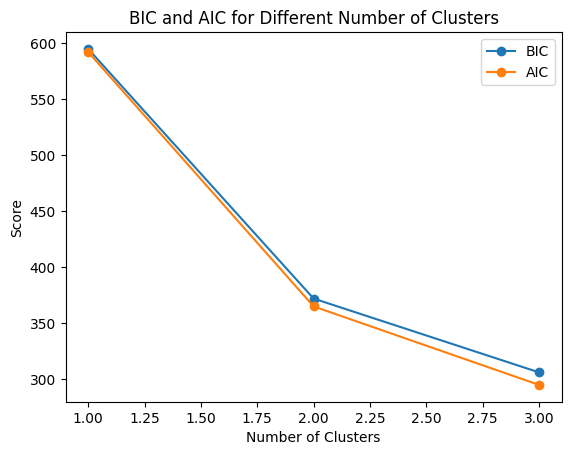

Optimal Number of Clusters: 3
Cluster Labels:
[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 2 0 2 2 2]


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Your data
data = np.array([109, 10079, 8, 106, 9898, 7, 117, 9920, 11, 84, 10034, 11, 116, 9951,
                 10, 117, 9980, 13, 115, 9970, 11, 94, 9948, 11, 95, 12, 106, 12, 8, 7])

# Reshape the data
data = data.reshape(-1, 1)

# Function to find the optimal number of clusters using BIC


# Here the is written because we want to use the default value of max_components
def find_optimal_clusters(data, max_components=3):
    bic_scores = []
    aic_scores = []

    for n_components in range(1, max_components + 1):
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(data)
        bic_scores.append(gmm.bic(data))
        aic_scores.append(gmm.aic(data))

    # Plot BIC and AIC scores
    plt.plot(range(1, max_components + 1), bic_scores, label='BIC', marker='o')
    plt.plot(range(1, max_components + 1), aic_scores, label='AIC', marker='o')
    plt.title('BIC and AIC for Different Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

    # Find the optimal number of clusters
    optimal_clusters = np.argmin(bic_scores) + 1
    print(f'Optimal Number of Clusters: {optimal_clusters}')
    return optimal_clusters


# Use the function with your data
optimal_clusters = find_optimal_clusters(data)

# Fit GMM with the optimal number of clusters
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm.fit(data)

# Predict cluster labels
labels = gmm.predict(data)

# Display the cluster labels
print("Cluster Labels:")
print(labels)

#### Finding cluster place and probability of number

In [26]:
import pandas as pd
# Create a DataFrame with the original data and the cluster labels
df = pd.DataFrame({'Data': data.flatten(), 'Cluster': labels})

# Create a dictionary to store DataFrames for each cluster
cluster_dfs = {}

# Iterate through unique cluster labels and create separate DataFrames
for cluster_label in df['Cluster'].unique():
    cluster_dfs[cluster_label] = df[df['Cluster']
                                    == cluster_label].reset_index(drop=True)

# Display the DataFrames for each cluster
for cluster_label, cluster_df in cluster_dfs.items():
    print(f"Cluster {cluster_label} DataFrame:")
    print(cluster_df)
    print("\n")

    # Calculate mean, variance, and probability for each cluster
    cluster_mean = cluster_df['Data'].mean()
    cluster_variance = cluster_df['Data'].var()
    cluster_probability = len(cluster_df) / len(df)

    print(f"Mean for Cluster {cluster_label}: {cluster_mean}")
    print(f"Variance for Cluster {cluster_label}: {cluster_variance}")
    print(f"Probability for Cluster {cluster_label}: {cluster_probability}")
    print("\n")

Cluster 0 DataFrame:
   Data  Cluster
0   109        0
1   106        0
2   117        0
3    84        0
4   116        0
5   117        0
6   115        0
7    94        0
8    95        0
9   106        0


Mean for Cluster 0: 105.9
Variance for Cluster 0: 131.2111111111111
Probability for Cluster 0: 0.3333333333333333


Cluster 1 DataFrame:
    Data  Cluster
0  10079        1
1   9898        1
2   9920        1
3  10034        1
4   9951        1
5   9980        1
6   9970        1
7   9948        1


Mean for Cluster 1: 9972.5
Variance for Cluster 1: 3508.0
Probability for Cluster 1: 0.26666666666666666


Cluster 2 DataFrame:
    Data  Cluster
0      8        2
1      7        2
2     11        2
3     11        2
4     10        2
5     13        2
6     11        2
7     11        2
8     12        2
9     12        2
10     8        2
11     7        2


Mean for Cluster 2: 10.083333333333334
Variance for Cluster 2: 4.265151515151515
Probability for Cluster 2: 0.4




In [27]:
from scipy.stats import norm
import numpy as np
from sklearn.mixture import GaussianMixture

mean = gmm.means_
covariance = gmm.covariances_
prior_probability = gmm.weights_

print("Mean of Clusters:")
print(mean)
print("\nCovariance Matrix of Clusters:")
print(covariance)
print("\nPrior Probabilities of Clusters:")
print(prior_probability)

number = 26


def probability_of_number(number, mean, covariance, prior_probability):
    num_clusters = len(mean)

    probabilities = np.zeros(num_clusters)

    for i in range(num_clusters):
        probabilities[i] = norm.pdf(number, mean[i, 0], np.sqrt(
            covariance[i, 0, 0])) * prior_probability[i]

    total_probability = np.sum(probabilities)

    probabilities /= total_probability

    for i in range(num_clusters):
        print(
            f"Probability of the point belonging to Cluster {i + 1}: {probabilities[i]}")


# Call the function with the parameters from your GMM
probability_of_number(number, mean, covariance, prior_probability)

Mean of Clusters:
[[ 105.9       ]
 [9972.5       ]
 [  10.08333333]]

Covariance Matrix of Clusters:
[[[ 118.090001  ]]

 [[3069.500001  ]]

 [[   3.90972322]]]

Prior Probabilities of Clusters:
[0.33333333 0.26666667 0.4       ]
Probability of the point belonging to Cluster 1: 0.9701759777560137
Probability of the point belonging to Cluster 2: 0.0
Probability of the point belonging to Cluster 3: 0.029824022243986316


#### AIC and BIC for determining Optimal K

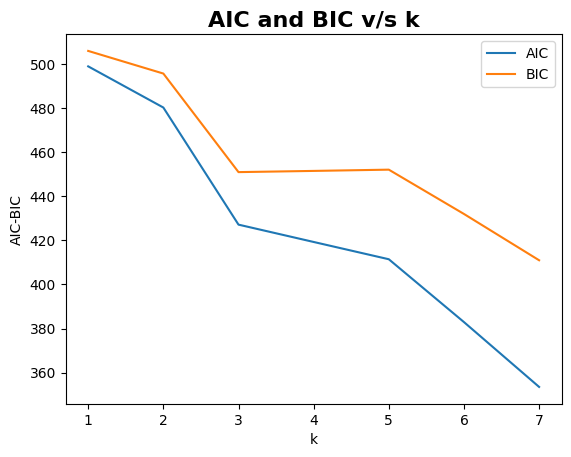

In [28]:
#AIC and BIC for determining Optimal K:
Sum_bic = []
Sum_aic = []

K = range(1,8)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm = gmm.fit(X)
    Sum_bic.append(gmm.bic(X))
    Sum_aic.append(gmm.aic(X))

x1 = K
y1 = Sum_aic
plt.plot(x1, y1, label = "AIC")
x2 = K
y2 = Sum_bic
plt.plot(x2, y2, label = "BIC")

plt.title("AIC and BIC v/s k", fontsize=16, fontweight='bold')
plt.xlabel("k")
plt.ylabel("AIC-BIC")
plt.legend(loc='upper right')
plt.show()

### Working with image

Number of clusters is :  5 for model :  <class 'sklearn.cluster._kmeans.KMeans'>


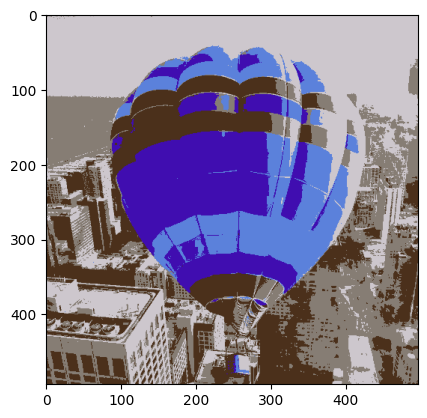

Number of clusters is :  5 for model :  <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>


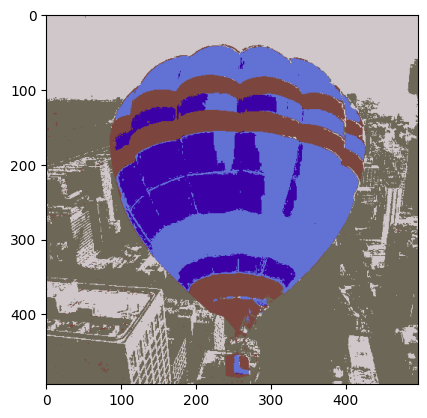

In [29]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pylab as plt
import cv2 as cv
import numpy as np

image = cv.imread("image.png")
image.shape

plt.imshow(image)

newImage = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
newImage.shape


def n_cluster_problem(labels, Ccentres):
    changedImage = []
    for i in range(len(labels)):
        changedImage.append(Ccentres[labels[i]])

    changedImage = np.array(changedImage)

    newChangeImage = changedImage.reshape(
        image.shape[0], image.shape[1], image.shape[2])

    plt.imshow(newChangeImage)


def n_cluster_KMean(n_clu):
    print("Number of clusters is : ", n_clu, "for model : ", KMeans)
    kmeans = KMeans(n_clusters=n_clu, max_iter=100000, random_state=5)
    kmeans.fit(newImage)
    labels = kmeans.predict(newImage)
    Ccentres = kmeans.cluster_centers_.astype(int)
    n_cluster_problem(labels, Ccentres)


def n_cluster_GMM(n_clu):
    print("Number of clusters is : ", n_clu, "for model : ", GMM)
    gmms = GMM(n_components=n_clu, max_iter=100000, random_state=5)
    gmms.fit(newImage)
    labels = gmms.predict(newImage)
    Ccentres = gmms.means_.astype(int)
    n_cluster_problem(labels, Ccentres)


clustr_size_arr = [5]

for size in (clustr_size_arr):
    n_cluster_KMean(size)
    plt.show()

for size in (clustr_size_arr):
    n_cluster_GMM(size)
    plt.show()

## Support Vector Machine (SVM) Algorithm

#### General code

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

Confusion Matrix:
 [[10  0]
 [ 2  8]]


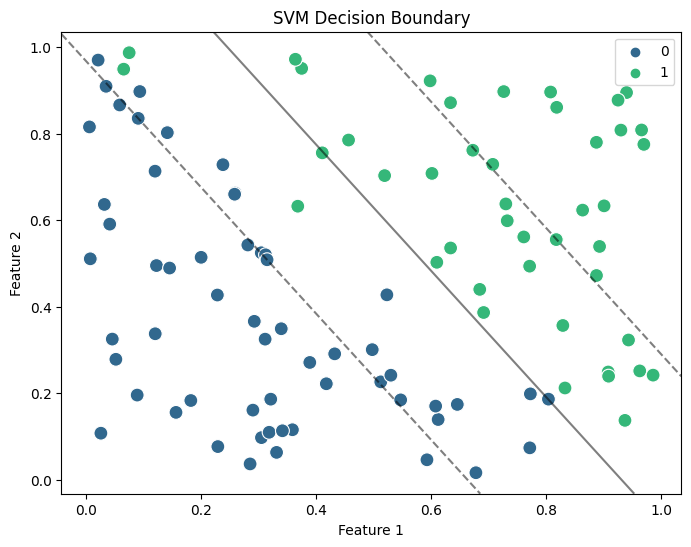

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate some example data
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary classification task

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
# model = SVC(kernel = 'linear')
# model = SVC(kernel = 'poly')
# modelSVM = SVC(kernel = 'sigmoid')
# modelSVM = SVC(kernel = 'poly', degree = 2)
svm_model = SVC(kernel='linear', C=1.0)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the decision boundary (for 2D data)
if X.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette='viridis', marker='o', s=100)

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary and margins
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [31]:
# Printing the first 2 support vectors
print("support_vectors_\n", svm_model.support_vectors_[0:2])

# Printing the number of support vectors for each class
print("n_support_\n", svm_model.n_support_[0:5])

# Printing the indices of support vectors
print("support_", svm_model.support_)

# Printing the intercept term in the decision function
print("intercept_", svm_model.intercept_)

# Printing the coefficients of the hyperplane
print("coef_", svm_model.coef_)

# Printing the coefficients of the support vector machine's dual problem
print("dual_coef_", svm_model.dual_coef_)

support_vectors_
 [[0.60754485 0.17052412]
 [0.67756436 0.01658783]]
n_support_
 [19 18]
support_ [ 5 12 15 18 23 30 33 34 50 52 53 58 68 69 72 73 76 78 79  1  4 11 14 19
 21 25 26 35 36 39 43 45 46 47 56 64 65]
intercept_ [-3.47584038]
coef_ [[3.73360197 2.56043102]]
dual_coef_ [[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -0.52544482 -1.         -1.
  -0.47455518  1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.        ]]


#### Transformed features using the kernel trick

In [32]:
import numpy as np

# Original 3-dimensional dataset (replace this with your actual dataset)
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    # Add more data points as needed
])

# Function to compute the transformed features using the kernel trick


def kernel_transform(data):
    num_samples, num_features = data.shape
    transformed_data = np.zeros(
        (num_samples, num_features + num_features * (num_features + 1) // 2 + 1))

    # Original dimensions
    transformed_data[:, :num_features] = data

    # Cross-products of original dimensions
    transformed_data[:, num_features:2*num_features] = data**2

    # Interaction terms
    idx = 2 * num_features
    for i in range(num_features):
        for j in range(i + 1, num_features):
            transformed_data[:, idx] = 2 * data[:, i] * data[:, j]
            idx += 1

    # Constant term
    transformed_data[:, -1] = 1

    return transformed_data


# Apply kernel transformation to the original data
transformed_X = kernel_transform(X)

# Print the transformed data
print("Original Data:")
print(X)
print("\nTransformed Data:")
print(transformed_X)
print("\nShape of Transformed Data:", transformed_X.shape)

Original Data:
[[1 2 3]
 [4 5 6]]

Transformed Data:
[[ 1.  2.  3.  1.  4.  9.  4.  6. 12.  1.]
 [ 4.  5.  6. 16. 25. 36. 40. 48. 60.  1.]]

Shape of Transformed Data: (2, 10)


## Principal component analysis, Singular value decomposition, Linear discriminant analysis 

#### Problem

In [33]:
import numpy as np

# Given eigenvalues and eigenvectors
eigenvalues = np.array([60, 40])
eigenvectors = np.array([[3, -4], [4, 3]])

# Calculate the diagonal matrix Lambda
Lambda = np.diag(eigenvalues)

# Calculate the inverse of the eigenvector matrix P
P_inv = np.linalg.inv(eigenvectors)

# Calculate the matrix M
M = np.dot(np.dot(eigenvectors, Lambda), P_inv)

print("Matrix M:")
print(M)

Matrix M:
[[47.2  9.6]
 [ 9.6 52.8]]


### Principal component analysis

#### Stepwise method

In [34]:
import numpy as np

# Step 1: Create a sample dataset
data = [[4, 11], [8, 4], [13, 5], [7, 14]]

# Step 2: Calculate the mean of each feature
mean_vector = np.mean(data, axis=0)

# Step 3: Calculate the covariance matrix
covariance_matrix = np.cov(data, rowvar=False)

# Step 4: Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 5: Choose the eigenvector corresponding to the largest eigenvalue
max_eigenvalue_index = np.argmax(eigenvalues)
top_eigenvector = eigenvectors[:, max_eigenvalue_index]

# Step 6: Project the original data onto the reduced-dimensional space
transformed_data = np.dot(data - mean_vector, top_eigenvector)

# Print the results
print("Original Data:")
print(data[:5])  # Displaying the first 5 rows of the original data
print("\nMean Vector:")
print(mean_vector)
print("\nCovariance Matrix:")
print(covariance_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)
print("\nTop Eigenvector:")
print(top_eigenvector)
print("\nTransformed Data:")
# Displaying the first 5 rows of the transformed data
print(transformed_data[:5])

Original Data:
[[4, 11], [8, 4], [13, 5], [7, 14]]

Mean Vector:
[8.  8.5]

Covariance Matrix:
[[ 14. -11.]
 [-11.  23.]]

Eigenvalues:
[ 6.61513568 30.38486432]

Eigenvectors:
[[-0.83025082  0.55738997]
 [-0.55738997 -0.83025082]]

Top Eigenvector:
[ 0.55738997 -0.83025082]

Transformed Data:
[-4.30518692  3.73612869  5.69282771 -5.12376947]


#### Columns decomposition code

In [35]:
import numpy as np
from sklearn.decomposition import PCA

# Given dataset
data = np.array([
    [10, 1, 10],
    [11, 5, 50],
    [12, 9, 90],
    [13, 13, 130],
    [14, 17, 165],
    [15, 21, 200],
    [16, 25, 250]
])

# Perform PCA to convert the dataset into 2 features
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

# Results for 14a and 14b
largest_eigenvalue = pca.explained_variance_[0]
percentage_variance_explained = sum(pca.explained_variance_ratio_) * 100

# Results for 14c
table_entries = transformed_data

# Print the results
print("14a.) Largest Eigenvalue:", largest_eigenvalue)
print("14b.) Percentage of Variance Explained by the Top 2 Features:",
      percentage_variance_explained)

# Print the table for 14c
print("\n14c.) Table for Corresponding Entries of 2 Features:")
print("S.No\tFeature 1\tFeature 2")
for i, entry in enumerate(table_entries, start=1):
    print(f"{i}\t{entry[0]:.4f}\t\t{entry[1]:.4f}")

14a.) Largest Eigenvalue: 7228.013825999401
14b.) Percentage of Variance Explained by the Top 2 Features: 99.99999999999999

14c.) Table for Corresponding Entries of 2 Features:
S.No	Feature 1	Feature 2
1	-118.5045		0.0361
2	-78.2926		-0.0507
3	-38.0808		-0.1375
4	2.1311		-0.2243
5	37.3704		0.2123
6	72.6097		0.6489
7	122.7666		-0.4847


#### Playing with load_iris

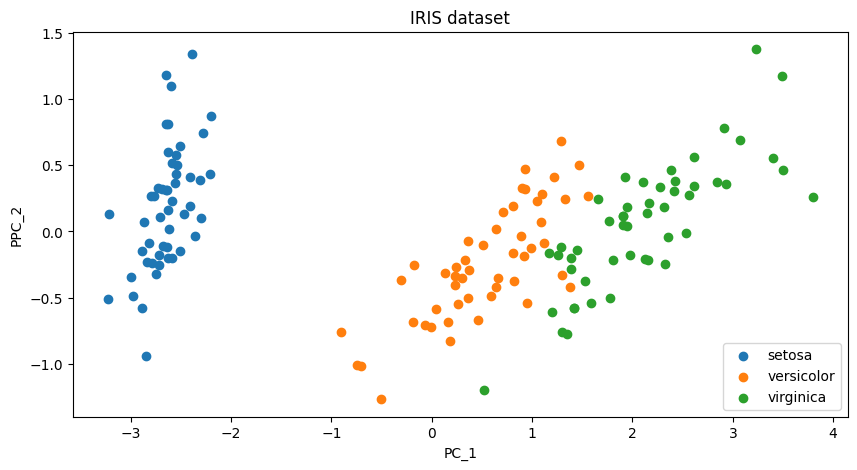

Variance Ratio : [0.92461872 0.05306648]


In [36]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 5))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)

plt.xlabel('PC_1')
plt.ylabel('PPC_2')
plt.title('IRIS dataset')
plt.legend()
plt.show()

explained_variance_ratio = pca.explained_variance_ratio_

print("Variance Ratio :", explained_variance_ratio)

### Singular value decomposition

#### Stepwise method

In [37]:
import numpy as np

# # Given matrix A
A = np.array([[1, 1],
              [0, 1],
              [-1, 1]])

# PART- 1
# Step 1: Compute A^T * A
ATA = np.dot(A.T, A)
print("A^T * A:")
print(ATA)

# Step 2: Compute eigenvalues and eigenvectors of A^T * A
eigenvalues_ATA, eigenvectors_ATA = np.linalg.eig(ATA)
print("\nEigenvalues of A^T * A:")
print(eigenvalues_ATA)
print("\nEigenvectors of A^T * A:")
print(eigenvectors_ATA)

# Step 3: Sort eigenvectors based on eigenvalues
sorted_indices = np.argsort(eigenvalues_ATA)[::-1]
sorted_eigenvectors_ATA = eigenvectors_ATA[:, sorted_indices]

print("\nSorted Eigenvectors of A^T * A:")
V = sorted_eigenvectors_ATA
print("V matrix:")
print(V)

# PART- 2
# Step 4: Compute eigenvalues_ATA
singular_values = np.sqrt(eigenvalues_ATA)
print("\nSingular Values:")
print(singular_values)

# Step 5: Sort singular values in descending order
sorted_indices = np.argsort(singular_values)[::-1]
singular_values = singular_values[sorted_indices]
print("\nSorted Singular Values:")
print(singular_values)

# Step 6: Construct the diagonal matrix Sigma
Sigma = np.zeros_like(A, dtype=float)
Sigma[:A.shape[1], :A.shape[1]] = np.diag(singular_values)
print("\nDiagonal Matrix Sigma:")
print(Sigma)

# PART- 3
# Step 7: Compute U
AAT = np.dot(A, A.T)
print("\nA * A^T:")
print(AAT)
eigenvalues_AAT, eigenvectors_AAT = np.linalg.eig(AAT)
print("\nEigenvalues of A * A^T:")
print(eigenvalues_AAT)
print("\nEigenvectors of A * A^T:")
print(eigenvectors_AAT)
sorted_indices = np.argsort(eigenvalues_AAT)[::-1]
sorted_eigenvectors_AAT = eigenvectors_AAT[:, sorted_indices]
U = sorted_eigenvectors_AAT
print("\nMatrix U:")
print(U)

# Step 8: Reconstruct the original matrix A from U, Sigma, and V^T
A_reconstructed = np.dot(np.dot(U, Sigma), V)
print("\nReconstructed Matrix A:")
print(A_reconstructed)

A^T * A:
[[2 0]
 [0 3]]

Eigenvalues of A^T * A:
[2. 3.]

Eigenvectors of A^T * A:
[[1. 0.]
 [0. 1.]]

Sorted Eigenvectors of A^T * A:
V matrix:
[[0. 1.]
 [1. 0.]]

Singular Values:
[1.41421356 1.73205081]

Sorted Singular Values:
[1.73205081 1.41421356]

Diagonal Matrix Sigma:
[[1.73205081 0.        ]
 [0.         1.41421356]
 [0.         0.        ]]

A * A^T:
[[2 1 0]
 [1 1 1]
 [0 1 2]]

Eigenvalues of A * A^T:
[-2.22044605e-16  2.00000000e+00  3.00000000e+00]

Eigenvectors of A * A^T:
[[ 4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [-8.16496581e-01  5.52174535e-16  5.77350269e-01]
 [ 4.08248290e-01 -7.07106781e-01  5.77350269e-01]]

Matrix U:
[[ 5.77350269e-01  7.07106781e-01  4.08248290e-01]
 [ 5.77350269e-01  5.52174535e-16 -8.16496581e-01]
 [ 5.77350269e-01 -7.07106781e-01  4.08248290e-01]]

Reconstructed Matrix A:
[[ 1.00000000e+00  1.00000000e+00]
 [ 7.80892716e-16  1.00000000e+00]
 [-1.00000000e+00  1.00000000e+00]]


#### SVD inbuilt function

In [38]:
import numpy as np

# Create a sample matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Perform Singular Value Decomposition
U, S, VT = np.linalg.svd(A)

# U: Left singular vectors
# S: Singular values
# VT: Right singular vectors (transpose)

# Reconstruct the original matrix from the SVD components
A_reconstructed = U @ np.diag(S) @ VT

# Print the results
print("Original Matrix:")
print(A)
print("\nU (Left Singular Vectors):")
print(U)
print("\nS (Singular Values):")
print(np.diag(S))
print("\nVT (Right Singular Vectors Transpose):")
print(VT)
print("\nReconstructed Matrix:")
print(A_reconstructed)

Original Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

U (Left Singular Vectors):
[[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]

S (Singular Values):
[[1.68481034e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.06836951e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.33475287e-16]]

VT (Right Singular Vectors Transpose):
[[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]

Reconstructed Matrix:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


#### SVD playing with image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


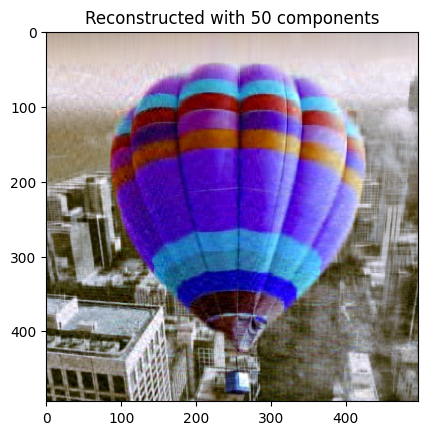

In [39]:
image = cv.imread("image.png")
image.shape

plt.imshow(image)
plt.title("Original image")

myImgnew = image.reshape(image.shape[0], image.shape[1]*image.shape[2])
myImgnew.shape

U, s, V = np.linalg.svd(myImgnew)


def SVD_n_components(num_components):
    image_reconstructed_n = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components]).dot(
        np.array(V[:num_components, :])))
    reconst_img_n = image_reconstructed_n.reshape(
        image.shape[0], image.shape[1], image.shape[2])
    reconst_img_n = np.round(reconst_img_n)
    reconst_img_n = reconst_img_n.astype(int)
    plt.imshow(reconst_img_n)
    plt.title(f'Reconstructed with {num_components} components')


SVD_n_components(50)

### Linear discriminant analysis

#### Playing with load_iris

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset (example dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(X_train, y_train)

# Transform the data to the LDA space
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Train a classifier (e.g., Logistic Regression) on the transformed data
classifier = LogisticRegression()
classifier.fit(X_train_lda, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_lda)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


#### Palying with LinearDiscriminantAnalysis

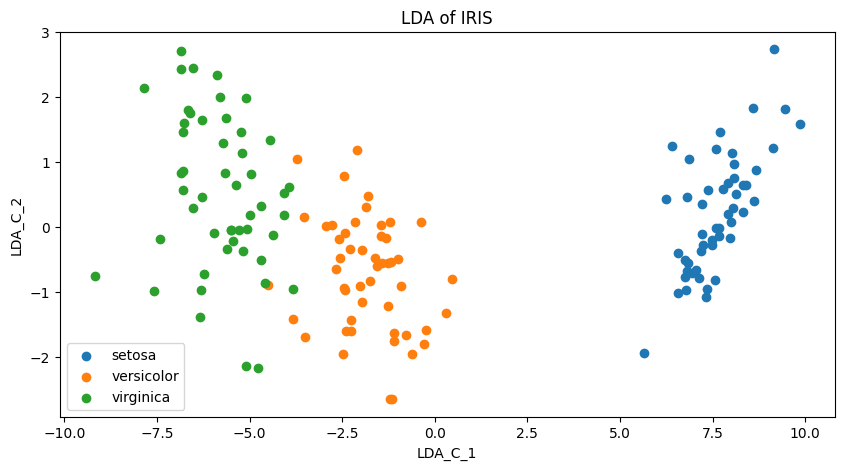

Variance Ratio : [0.9912126 0.0087874]
Coef : [[  6.31475846  12.13931718 -16.94642465 -20.77005459]
 [ -1.53119919  -4.37604348   4.69566531   3.06258539]
 [ -4.78355927  -7.7632737   12.25075935  17.7074692 ]]
Intercept : [-15.47783673  -2.02197415 -33.53768674]
Means : [[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]


In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(10, 5))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=target_name)

plt.xlabel('LDA_C_1')
plt.ylabel('LDA_C_2')
plt.title('LDA of IRIS')
plt.legend()
plt.show()

print("Variance Ratio :", lda.explained_variance_ratio_)
print("Coef :", lda.coef_)
print("Intercept :", lda.intercept_)
print("Means :", lda.means_)

## Text analytics

### Problems

##### Problem 1

In [42]:
# Given information
total_documents = 600
unique_terms = 800
average_unique_terms_per_document = 10

# Calculate the total number of entries in the DTM
total_entries_dtm = total_documents * unique_terms

# Calculate the number of non-zero entries in the DTM
non_zero_entries_dtm = total_documents * average_unique_terms_per_document

# Calculate the number of zero entries in the DTM
zero_entries_dtm = total_entries_dtm - non_zero_entries_dtm

# Calculate the percentage of zeros in the DTM
percentage_zeros_dtm = (zero_entries_dtm / total_entries_dtm) * 100

print(
    f"Percentage of zeros in the Document Term Matrix (DTM): {percentage_zeros_dtm:.2f}%")

print(100 - ((total_documents * average_unique_terms_per_document) /(total_documents * unique_terms))*100)

Percentage of zeros in the Document Term Matrix (DTM): 98.75%
98.75


##### Problem 2

In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Given sentences
sentences = ["enough of this subject",
             "enough of this semester", "enough is enough"]

# Remove stopwords
stopwords = set(["of", "this", "is"])
sentences = [" ".join([word for word in sentence.split(
) if word.lower() not in stopwords]) for sentence in sentences]

# 1. Document Term Matrix (DTM)
vectorizer_dtm = CountVectorizer()
dtm = vectorizer_dtm.fit_transform(sentences)

# Convert DTM to a dense array for better visibility
dtm_array = dtm.toarray()

# Display DTM
print("Document Term Matrix (DTM):")
print(vectorizer_dtm.get_feature_names_out())
print(dtm_array)

# 2. TF-IDF Matrix
vectorizer_tfidf = TfidfVectorizer(norm=None, smooth_idf=False)
tfidf = vectorizer_tfidf.fit_transform(sentences)

# Convert TF-IDF matrix to a dense array for better visibility
tfidf_array = tfidf.toarray()

# Display TF-IDF matrix
print("\nTF-IDF Matrix:")
print(vectorizer_tfidf.get_feature_names_out())
print(tfidf_array)

# 3. Cosine Similarity between S1 and S3
cosine_sim_matrix = cosine_similarity(dtm_array)
cosine_sim_s1_s3 = cosine_sim_matrix[0, 2]

print("\nCosine Similarity between S1 and S3:", cosine_sim_s1_s3)

# 4. Cosine Similarity
cs = cosine_similarity(dtm_array)
print(cs)

Document Term Matrix (DTM):
['enough' 'semester' 'subject']
[[1 0 1]
 [1 1 0]
 [2 0 0]]

TF-IDF Matrix:
['enough' 'semester' 'subject']
[[1.         0.         2.09861229]
 [1.         2.09861229 0.        ]
 [2.         0.         0.        ]]

Cosine Similarity between S1 and S3: 0.7071067811865475
[[1.         0.5        0.70710678]
 [0.5        1.         0.70710678]
 [0.70710678 0.70710678 1.        ]]


##### Problem 3

In [44]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Given data
actual_classes = ['Sports', 'Movie', 'Sports', 'Sports',
                  'Sports', 'Politics', 'Sports', 'Movie', 'Politics']
predicted_classes = ['Movie', 'Movie', 'Politics', 'Sports',
                     'Politics', 'Sports', 'Sports', 'Sports', 'Politics']

# Convert class labels to numerical values
class_labels = ['Sports', 'Movie', 'Politics']
actual_numeric = np.array([class_labels.index(label)
                          for label in actual_classes])
predicted_numeric = np.array([class_labels.index(label)
                             for label in predicted_classes])

# 4a.) Accuracy
accuracy = accuracy_score(actual_numeric, predicted_numeric)
print("Accuracy:", accuracy)

# 4b.) Confusion Matrix
conf_matrix = confusion_matrix(
    actual_numeric, predicted_numeric, labels=[0, 1, 2])
print("Confusion Matrix:")
print(conf_matrix)

# 4c.) F1 Score for class - Movie
f1_movie = f1_score(actual_numeric, predicted_numeric,
                    labels=[1], average='micro')
print("F1 Score for class - Movie:", f1_movie)

Accuracy: 0.4444444444444444
Confusion Matrix:
[[2 1 2]
 [1 1 0]
 [1 0 1]]
F1 Score for class - Movie: 0.5


##### Problem 4

In [45]:
# Given scores
neg_score = 0.212
neu_score = 0.364
compound_score = 0.5423

# Calculate the missing pos score
pos_score = 1 - (neg_score + neu_score)

# Print the result
print("Pos Score:", pos_score)

Pos Score: 0.42400000000000004


### Working in Text analytics

#### WordCloud

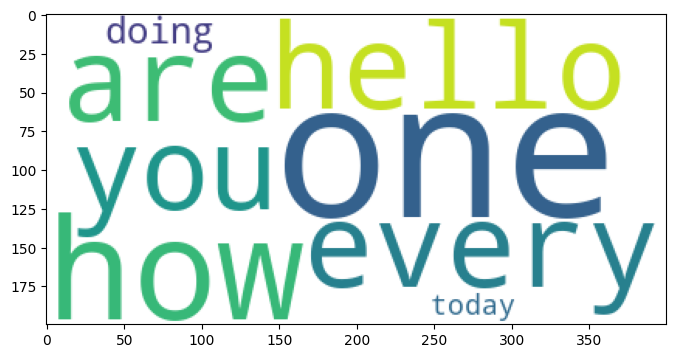

In [46]:
from wordcloud import WordCloud
reviews_combined = "hello every one how are you doing today hello every one how one how are you doing"

word_cloud = WordCloud(width=400, height=200, background_color='white', max_words=100, stopwords=['phone', 'of', 'the'], collocations=False).\
    generate_from_text(reviews_combined)
plt.figure(figsize=[8, 8])
plt.imshow(word_cloud)
plt.show()

#### word_tokenize

In [47]:
from nltk.tokenize import word_tokenize
reviews_combined
all_terms = word_tokenize(reviews_combined.lower())

#### FreqDist

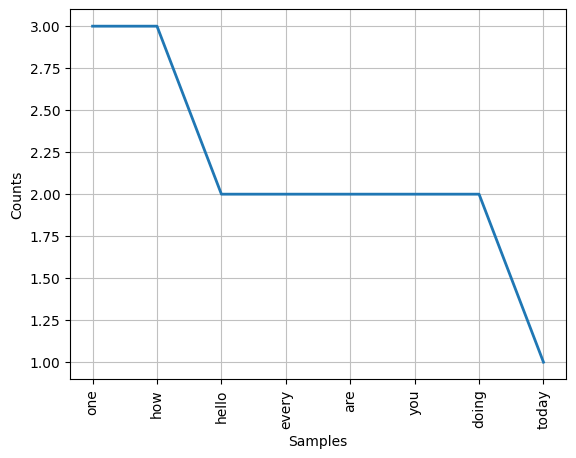

In [48]:
from nltk.probability import FreqDist
fdist = FreqDist(all_terms)
fdist
fdist.plot(30,cumulative=False)
plt.show()

#### punctuation, stopwords

In [49]:
from string import punctuation
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")
stop_updated = stop_nltk + list(punctuation) + ["are", "you"]
allterms_updated = [word for word in all_terms if word not in stop_updated and len(word) >= 2]
allterms_updated

['hello', 'every', 'one', 'today', 'hello', 'every', 'one', 'one']

#### SnowballStemmer

In [50]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")
reviews_updated_stem = [ stemmer_s.stem(word) for word in allterms_updated]
reviews_updated_stem

['hello', 'everi', 'one', 'today', 'hello', 'everi', 'one', 'one']

#### WordNetLemmatizer

In [51]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
reviews_updated_lemm = [ lemm.lemmatize(word) for word in allterms_updated]
reviews_updated_lemm

['hello', 'every', 'one', 'today', 'hello', 'every', 'one', 'one']

#### CountVectorizer

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Custom tokenizer that includes very short words


def custom_tokenizer(text):
    return text.split()


reviews_updated_lemm = ['hello hello one', 'every every ', 'one every every',
                        'today one', 'hello today', 'every today', 'one today', 'one every']

# Create a bigram count vectorizer object with the custom tokenizer
# Increase max_features or provide more diverse input to avoid empty vocabulary
bigram_count_vectorizer = CountVectorizer(ngram_range=(
    2, 2), max_features=10, tokenizer=custom_tokenizer)

X_bigram = bigram_count_vectorizer.fit_transform(reviews_updated_lemm)

# Check the vocabulary after fitting the vectorizer
vocab = bigram_count_vectorizer.get_feature_names()

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=vocab)
DTM_bigram

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,every every,every today,hello hello,hello one,hello today,one every,one today,today one
0,0,0,1,1,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0
5,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0
7,0,0,0,0,0,1,0,0


#### Sentiment Classification

In [53]:
# afinn = pd.read_csv("AFINN-111.txt", sep="\t", header=None)
# afinn.columns = ['Term', 'Score']
# term_scores = dict(afinn.values)


# def get_sentiment(sent):
#     tokens = word_tokenize(sent.lower())
#     score = 0
#     for term in tokens:
#         score += term_scores.get(term, 0)
#     return score

# get_sentiment("")

#### SentimentIntensityAnalyzer

In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)

get_vader_sentiment("I am very happy today")

{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.6115}

#### TfidfVectorizer

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1500)

X_train = ["I ok", "I am ok", "I am not ok"]
X_test = ["I ok", "I am ok", "I am not ok"]

X_train_bow = vectorizer.fit_transform(X_train)

X_test_bow = vectorizer.transform(X_test)

X_train_bow.shape, X_test_bow.shape

((3, 3), (3, 3))

#### word_tokenize, wordpunct_tokenize, TweetTokenizer, regexp_tokenize

In [56]:
from nltk.tokenize import word_tokenize
txt1 = "This class isn't good, is it? it couldn't have. been a better place than this!!"
print(word_tokenize(txt1))

from nltk.tokenize import wordpunct_tokenize
print(wordpunct_tokenize(txt1))

from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
print(tknzr.tokenize(txt1))

from nltk.tokenize import regexp_tokenize
print(regexp_tokenize(txt1, pattern='\w+'))


['This', 'class', 'is', "n't", 'good', ',', 'is', 'it', '?', 'it', 'could', "n't", 'have', '.', 'been', 'a', 'better', 'place', 'than', 'this', '!', '!']
['This', 'class', 'isn', "'", 't', 'good', ',', 'is', 'it', '?', 'it', 'couldn', "'", 't', 'have', '.', 'been', 'a', 'better', 'place', 'than', 'this', '!!']
['This', 'class', "isn't", 'good', ',', 'is', 'it', '?', 'it', "couldn't", 'have', '.', 'been', 'a', 'better', 'place', 'than', 'this', '!', '!']
['This', 'class', 'isn', 't', 'good', 'is', 'it', 'it', 'couldn', 't', 'have', 'been', 'a', 'better', 'place', 'than', 'this']


#### PorterStemmer

In [57]:
from nltk.stem import PorterStemmer
stemmer_p = PorterStemmer()
stemmer_p.stem("Hello everyone how are you doing today, I am doing good today done")

'hello everyone how are you doing today, i am doing good today don'

#### emot

In [58]:
import emot
text = "very bad phone :) :P :D"
emot_obj = emot.emot()
emot_obj.emoticons(text)

{'value': [':)', ':P', ':D'],
 'location': [[15, 17], [18, 20], [21, 23]],
 'mean': ['Happy face or smiley',
  'Tongue sticking out, cheeky, playful or blowing a raspberry',
  'Laughing, big grin or laugh with glasses'],
 'flag': True}

### N-gram

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample data
reviews_updated_lemm = ['hello hello one', 'every every ', 'one every every',
                        'today one', 'hello today', 'every today', 'one today', 'one every']

# Create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=500)

# Transform the data
X_bigram = bigram_count_vectorizer.fit_transform(reviews_updated_lemm)

# Check the vocabulary after fitting the vectorizer
vocab_bigram = bigram_count_vectorizer.get_feature_names_out()
print("Vocabulary for bigram:")
print(vocab_bigram)

# Creating a DTM for bigram
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=vocab_bigram)
print("DTM for bigram:")
print(DTM_bigram)

Vocabulary for bigram:
['every every' 'every today' 'hello hello' 'hello one' 'hello today'
 'one every' 'one today' 'today one']
DTM for bigram:
   every every  every today  hello hello  hello one  hello today  one every  \
0            0            0            1          1            0          0   
1            1            0            0          0            0          0   
2            1            0            0          0            0          1   
3            0            0            0          0            0          0   
4            0            0            0          0            1          0   
5            0            1            0          0            0          0   
6            0            0            0          0            0          0   
7            0            0            0          0            0          1   

   one today  today one  
0          0          0  
1          0          0  
2          0          0  
3          0          1  
4          0

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample data
reviews_updated_lemm = ['hello hello one', 'every every hello hello one', 'one every every',
                        'today one', 'hello today', 'every today', 'one hello hello one today', 'one every']

# Create an n-gram count vectorizer object (n can be adjusted)
ngram_count_vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=500)

# Transform the data
X_ngram = ngram_count_vectorizer.fit_transform(reviews_updated_lemm)

# Check the vocabulary after fitting the vectorizer
vocab_ngram = ngram_count_vectorizer.get_feature_names_out()
print("Vocabulary for n-gram:")
print(vocab_ngram)

# Creating a DTM for n-gram
DTM_ngram = pd.DataFrame(X_ngram.toarray(), columns=vocab_ngram)
print("DTM for n-gram:")
print(DTM_ngram)

Vocabulary for n-gram:
['every' 'every every' 'every every hello' 'every hello'
 'every hello hello' 'every today' 'hello' 'hello hello' 'hello hello one'
 'hello one' 'hello one today' 'hello today' 'one' 'one every'
 'one every every' 'one hello' 'one hello hello' 'one today' 'today'
 'today one']
DTM for n-gram:
   every  every every  every every hello  every hello  every hello hello  \
0      0            0                  0            0                  0   
1      2            1                  1            1                  1   
2      2            1                  0            0                  0   
3      0            0                  0            0                  0   
4      0            0                  0            0                  0   
5      1            0                  0            0                  0   
6      0            0                  0            0                  0   
7      1            0                  0            0                  0   

## Artificial neural network

#### MLPClassifier

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

learn_data, test_data, learn_labels, test_labels = train_test_split(
    X, y, test_size=0.3, random_state=61123)

mlp_clf = MLPClassifier(random_state=1, activation='relu', max_iter=30000,
                        hidden_layer_sizes=(10, 5)).fit(learn_data, learn_labels)
mlp_clf.fit(learn_data, learn_labels)

yp = mlp_clf.predict(test_data)
print(mlp_clf.predict(test_data))
print(mlp_clf.score(test_data, test_labels))
cm = confusion_matrix(test_labels, yp)
print(cm)

[1 2 2 2 1 2 1 2 2 2 0 0 0 0 1 2 0 1 0 0 0 2 2 1 1 2 0 1 1 0 0 0 1 0 1 0 2
 0 2 0 1 0 0 1 0]
0.9777777777777777
[[19  0  0]
 [ 0 12  0]
 [ 0  1 13]]


#### StandardScaler

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
# Backpropagation Algorithm, How to find good weights, regularization, scaling
# activation functions, number of hidden layers, number of neurons in hidden layers, number of epochs, batch size, learning rate, momentum, early stopping, dropout, batch normalization, weight initialization, gradient checking, hyperparameter tuning, cross-validation, etc.

## Deep Learning

In [64]:
import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
import random
from tensorflow.keras import datasets, layers, models
import tensorflow_hub as hub

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
import gensim

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'resource'

In [ ]:
X_train_scaled = [[], [], []]
y_train = []
X_test_scaled = [[], [], []]

reviews = ["", ""]
sentiment = np.array([0, 1])

### Different functions

In [ ]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))


def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))


def relu(x):
    return max(0, x)


def leaky_relu(x):
    return max(0.1*x, x)

### Errors

In [ ]:
y_predicted = np.array([1, 1, 0, 0, 1])
y_true = np.array([0.30, 0.7, 1, 0, 0.5])

In [ ]:
def mae(y_predicted, y_true):
    total_error = 0
    for yp, yt in zip(y_predicted, y_true):
        total_error += abs(yp - yt)
    print("Total error is:", total_error)
    mae = total_error/len(y_predicted)
    print("Mean absolute error is:", mae)
    return mae

In [ ]:
def mae_np(y_predicted, y_true):
    return np.mean(np.abs(y_predicted-y_true))

In [ ]:
epsilon = 1e-15
# y_predicted new is a list of values changed to avoid log(0), by adding epsilon to small values and subtracting epsilon from large values

y_predicted_new = [max(i, epsilon) for i in y_predicted]
y_predicted_new

y_predicted_new = [min(i, 1-epsilon) for i in y_predicted_new]
y_predicted_new

In [ ]:
# Define the log_loss function with parameters:
# - y_true: true labels (ground truth)
# - y_predicted: predicted probabilities for the positive class
def log_loss(y_true, y_predicted):
    # Define a small constant epsilon to prevent log(0) issues
    epsilon = 1e-15

    # Clip predicted probabilities to avoid log(0) and log(1) issues
    y_predicted_new = [max(i, epsilon) for i in y_predicted]
    y_predicted_new = [min(i, 1 - epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)

    # Calculate the log loss for binary classification
    loss = -np.mean(y_true * np.log(y_predicted_new) +
                    (1 - y_true) * np.log(1 - y_predicted_new))

    # Return the calculated log loss
    return loss

### Gradient descent

In [65]:
def sigmoid_numpy(X):
    return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12, 0, 1]))

array([0.99999386, 0.5       , 0.73105858])

In [66]:
# Define the gradient_descent function with parameters:
# - age: array of age values
# - affordability: array of affordability values
# - y_true: true labels
# - epochs: number of iterations for gradient descent
# - loss_threshold: threshold to stop training if the loss falls below it
def gradient_descent(age, affordability, y_true, epochs, loss_threshold):
    # Initialize weights and bias
    w1 = w2 = 1
    bias = 0
    # Set the learning rate
    rate = 0.4
    # Get the number of samples
    n = len(age)

    # Perform gradient descent for the specified number of epochs
    for i in range(epochs):
        # Calculate the weighted sum of inputs
        weighted_sum = w1 * age + w2 * affordability + bias
        # Apply the sigmoid function to get predicted probabilities
        y_predicted = sigmoid_numpy(weighted_sum)
        # Calculate the log loss
        loss = log_loss(y_true, y_predicted)

        # Calculate the gradients with respect to weights and bias
        w1d = (1/n) * np.dot(np.transpose(age), (y_predicted - y_true))
        w2d = (1/n) * np.dot(np.transpose(affordability), (y_predicted - y_true))
        bias_d = np.mean(y_predicted - y_true)

        # Update weights and bias using the gradients and learning rate
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        # Print the current epoch, weights, bias, and loss
        print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        # Check if the loss is below the specified threshold
        if loss <= loss_threshold:
            break

    # Return the optimized weights and bias
    return w1, w2, bias

### Neural network

In [68]:
model=keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5)

model.evaluate(X_test_scaled,y_test)
model.predict(X_test_scaled)
coef, intercept = model.get_weights()

In [69]:
# Define the myNN class
class customNN:
    def __init__(self):
        # Initialize weights and bias
        self.w1 = 1
        self.w2 = 1
        self.bias = 0

    def fit(self, X, y, epochs, loss_threshold):
        # Fit the model using gradient descent
        self.w1, self.w2, self.bias = self.gradient_descent(
            X['age'], X['affordibility'], y, epochs, loss_threshold)
        # Print final weights and bias
        print(
            f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")

    def predict(self, X_test):
        # Make predictions using the trained model
        weighted_sum = self.w1 * X_test['age'] + \
            self.w2 * X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age, affordability, y_true, epochs, loss_threshold):
        # Gradient descent optimization
        w1 = w2 = 1
        bias = 0
        rate = 0.4
        n = len(age)

        for i in range(epochs):
            # Calculate the weighted sum and predicted probabilities
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            # Calculate the log loss
            loss = log_loss(y_true, y_predicted)

            # Calculate gradients
            w1d = (1/n) * np.dot(np.transpose(age), (y_predicted - y_true))
            w2d = (1/n) * np.dot(np.transpose(affordability),
                                 (y_predicted - y_true))
            bias_d = np.mean(y_predicted - y_true)

            # Update weights and bias
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d

            # Print progress every 50 epochs
            if i % 50 == 0:
                print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

            # Check if the loss is below the specified threshold
            if loss <= loss_threshold:
                print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        # Return the optimized weights and bias
        return w1, w2, bias

In [70]:
customModel = customNN()
customModel.fit(X_train_scaled, y_train, epochs=10, loss_thresold=0.5)

In [71]:
customModel.predict(X_test_scaled)

### Stochastic and batch grandient descent

#### We will use very simple home prices data set to implement mini batch gradient descent in python. 
1. Batch Gradient Descent processes the entire dataset in each iteration, making it computationally expensive but stable.
2. Stochastic Gradient Descent, on the other hand, uses a single random sample per iteration, leading to faster updates but higher variance.
3. Mini-Batch Gradient Descent strikes a balance by employing batches of 'm' samples, leveraging parallelism and computational efficiency. It inherits advantages from both extremes and is commonly preferred in practice. The choice of 'm' depends on the dataset size and computational resources.
- Batch GD is stable but slow, Stochastic GD is fast but noisy, while Mini-Batch GD optimally balances efficiency and convergence speed, making it a popular choice for training machine learning models.

In [73]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    # Get the number of features in the input data
    number_of_features = X.shape[1]
    # Initialize weights and bias
    w = np.ones(shape=(number_of_features))
    b = 0
    # Get the total number of samples
    total_samples = X.shape[0]

    # Lists to store the cost and epoch values for visualization
    cost_list = []
    epoch_list = []

    # Iterate through the specified number of epochs
    for i in range(epochs):
        # Calculate the predicted values using the current weights and bias
        y_predicted = np.dot(w, X.T) + b

        # Calculate gradients for weights and bias using the mean squared error loss
        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)

        # Update weights and bias using the gradients and learning rate
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        # Calculate and store the mean squared error cost
        cost = np.mean(np.square(y_true - y_predicted))

        # Print cost every 10 epochs and store values for visualization
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    # Return the final weights, bias, and lists for cost and epoch values
    return w, b, cost, cost_list, epoch_list


# Example usage
w, b, cost, cost_list, epoch_list = batch_gradient_descent(
    X_train_scaled, y_train.reshape(y_train.shape[0],), 500)
w, b, cost

In [74]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    # Get the number of features in the input data
    number_of_features = X.shape[1]
    # Initialize weights and bias
    w = np.ones(shape=(number_of_features))
    b = 0
    # Get the total number of samples
    total_samples = X.shape[0]

    # Lists to store the cost and epoch values for visualization
    cost_list = []
    epoch_list = []

    # Iterate through the specified number of epochs
    for i in range(epochs):
        # Randomly select a single training sample
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        # Calculate the predicted value using the current weights and bias
        y_predicted = np.dot(w, sample_x.T) + b

        # Calculate gradients for weights and bias using the mean squared error loss
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples)*(sample_y - y_predicted)

        # Update weights and bias using the gradients and learning rate
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        # Calculate and store the mean squared error cost for the selected sample
        cost = np.square(sample_y - y_predicted)

        # Print cost every 100 epochs and store values for visualization
        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    # Return the final weights, bias, and lists for cost and epoch values
    return w, b, cost, cost_list, epoch_list


# Example usage
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(
    X_train_scaled, y_train.reshape(y_train.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

In [75]:
def mini_batch_gradient_descent(X, y_true, epochs=100, batch_size=5, learning_rate=0.01):
    # Get the number of features in the input data
    number_of_features = X.shape[1]
    # Initialize weights and bias
    w = np.ones(shape=(number_of_features))
    b = 0
    # Get the total number of samples
    total_samples = X.shape[0]

    # Adjust batch size if it's greater than the total number of samples
    if batch_size > total_samples:
        batch_size = total_samples

    # Lists to store the cost and epoch values for visualization
    cost_list = []
    epoch_list = []

    # Calculate the number of batches
    num_batches = int(total_samples / batch_size)

    # Iterate through the specified number of epochs
    for i in range(epochs):
        # Randomly permute the indices to shuffle the dataset
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]

        # Iterate through each batch
        for j in range(0, total_samples, batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]

            # Calculate the predicted values using the current weights and bias
            y_predicted = np.dot(w, Xj.T) + b

            # Calculate gradients for weights and bias using the mean squared error loss
            w_grad = -(2/len(Xj)) * (Xj.T.dot(yj - y_predicted))
            b_grad = -(2/len(Xj)) * np.sum(yj - y_predicted)

            # Update weights and bias using the gradients and learning rate
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            # Calculate and store the mean squared error cost for the current batch
            cost = np.mean(np.square(yj - y_predicted))

        # Print cost every 10 epochs and store values for visualization
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    # Return the final weights, bias, and lists for cost and epoch values
    return w, b, cost, cost_list, epoch_list


# Example usage
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    X_train_scaled,
    y_train.reshape(y_train.shape[0],),
    epochs=120,
    batch_size=5
)
w, b, cost

### Dropout Regularization

In [ ]:
modeld = keras.Sequential([
    keras.layers.Dense(64, input_dim=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modeld.compile(loss='sparse_categorical_crossentropy',
               optimizer='adam', metrics=['accuracy'])

modeld.fit(X_train_scaled, y_train, epochs=10, batch_size=16)

modeld.evaluate(X_test, y_test)

###  Mitigating Skewdness of Data

#### Method 1: Undersampling

In [ ]:
# Class count
count_class_0, count_class_1 = X_train_scaled.A.value_counts()

# Divide by class
df_class_0 = X_train_scaled[X_train_scaled['A'] == 0]
df_class_1 = X_train_scaled[X_train_scaled['A'] == 1]

# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under sampling:')
print(df_test_under.A.value_counts())

X = df_test_under.drop('A', axis='columns')
y = df_test_under['A']

#### Method 2: Oversampling

In [ ]:
df_class_1_over = X_train_scaled.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.A.value_counts())

#### Method 3: SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
# X_sm, y_sm = smote.fit_sample(X, y)
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

#### Method 4: Use of Ensemble with undersampling

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('A', axis='columns')
    y_train = df_train.A
    return X_train, y_train


X_train, y_train = get_train_batch([[]], [[]], 0, 1495)

### Convolutional Neural Network

In [ ]:
cnn_model = models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                  activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


cnn_model.fit(X_train, y_train, epochs=10)

cnn_model.evaluate(X_test, y_test)

y_pred = cnn_model.predict(X_test)

y_classes = [np.argmax(element) for element in y_pred]

### Data Augmentation

In [ ]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1)
])

model_data_augmentation = models.Sequential([
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3, 3),
                  activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_data_augmentation.compile(optimizer='adam',
                                loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_data_augmentation.fit(X_train_scaled, y_train, epochs=30)

model_data_augmentation.evaluate(X_test_scaled, y_test)

### CNN Transfer learning

In [ ]:
feature_extractor_model = "link"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

model.evaluate(X_test_scaled, y_test)

### Word embeddings

In [ ]:
vocab_size = 30
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
print(encoded_reviews)

max_length = 4
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
print(padded_reviews)

In [ ]:
embeded_vector_size = 5

model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size,
          input_length=max_length, name="embedding"))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())

model.fit(X, y, epochs=50, verbose=0)

loss, accuracy = model.evaluate(X, y)

weights = model.get_layer('embedding').get_weights()[0]

### Word gensim

In [ ]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

model.build_vocab("review_text", progress_per=1000)

model.train("review_text", total_examples=model.corpus_count, epochs=model.epochs)

model.wv.most_similar("bad")

### RNN

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

dataset =[[],[]]

train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
e = tf.keras.layers.experimental.preprocessing.TextVectorization()
e.adapt(["", "", "", ""])
e.get_vocabulary()

VOCAB_SIZE = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)